In [152]:
!git clone https://github.com/GazizovK/rcvs

fatal: destination path 'rcvs' already exists and is not an empty directory.


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [0]:
def countplot(x, data, hue = None, myTitle = '', myLabels = [], xlabel = '', size = (12, 6), ticks_l = None, rotation = 0):
  plt.subplots(figsize = size)
  sns.countplot(x = x, data = data, hue = hue)
  plt.title(myTitle)
  plt.xlabel(xlabel)
  plt.ylabel('Количество')
  if ticks_l != None:
    plt.xticks(ticks = np.arange(len(ticks_l)), labels = ticks_l, rotation=rotation)
  plt.grid()
  for t, l in zip(plt.legend().get_texts(), myLabels): t.set_text(l)
  plt.show()

In [0]:
data = pd.read_csv('rcvs/rcvs_dataset_2019-06-21.csv')

In [0]:
data

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q5_1T,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,...,crime_is_property_damage,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped
0,12646573,544,1,57,1,2.0,2.0,NaN,полтора года тому назад,1.0,NaN,1.0,2.0,1.0,8.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,13.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,300.0,2.477121,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12658422,1643,1,59,1,4.0,1.0,2.0,открытый грабеж-выхватили сумку с документами ...,2.0,4.0,NaN,1.0,1.0,1.0,NaN,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,3.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,NaN,0.0,1.0,1.0,1.0,0.0,NaN,80000.0,4.903090,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,8.0,6.0
2,12660336,676,1,35,1,1.0,2.0,NaN,"покупка на авито ,мы отправили деньги ,но нам...",1.0,NaN,14.0,2.0,1.0,12.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,13.0,7.0,7.0,0.0,0.0,1.0,1.0,1.0,NaN,3000.0,3.477121,1.0,1.0,NaN,3.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12664831,510,1,22,1,1.0,2.0,NaN,украли телефон,2.0,1.0,NaN,2.0,1.0,6.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,7000.0,3.845098,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12666214,1107,1,79,1,3.0,2.0,NaN,"мошенничество,говорят и звонят я твой сын и до...",1.0,NaN,1.0,2.0,1.0,8.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,13.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.000000,1.0,1.0,2.0,2.0,1.0,1.0,0.0,NaN,NaN,0.0,4.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16813,15571472,86,2,30,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16814,15571587,494,1,34,1,1.0,1.0,1.0,мошенничество . афера через интернет,1.0,NaN,1.0,1.0,2.0,4.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,13.0,7.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,1500.0,3.176091,1.0,1.0,NaN,1.0,1.0,3.0,0.0,NaN,NaN,0.0,4.0,0.0,NaN,1.0,N

In [0]:
data.describe()

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,Q20_2,...,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped,IVDur_m,cnt_of_nans
count,1.681800e+04,16818.000000,16818.000000,16818.000000,16818.000000,3001.000000,3001.000000,1288.000000,3001.000000,2098.000000,903.000000,3001.000000,3001.000000,3001.000000,602.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,2905.000000,3001.000000,3001.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,1986.000000,2047.000000,2047.0,110.000000,26.000000,...,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,903.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,350.000000,1.681800e+04,16818.000000,1447.000000,3001.000000,444.000000,1315.000000,1448.000000,1027.000000,3001.000000,785.000000,787.000000,646.000000,3001.000000,3001.000000,787.000000,3001.000000,1467.000000,1460.000000,1507.000000,1470.000000,1506.000000,1469.000000,1469.000000,16818.000000,13776.000000
mean,1.412528e+07,256.654418,1.447378,43.420978,1.823998,6.394202,1.575475,6.978261,1.706764,4.373689,2.730897,1.483839,1.465511,7.552483,2.877076,1.591136,0.313562,0.125292,0.035655,0.030656,0.160613,0.037987,0.054648,0.038321,0.049570,0.311230,0.006664,0.399609,0.168051,0.029800,0.025403,0.219345,0.041524,0.049829,0.024426,0.049345,0.143136,0.0,2.872727,2.846154,...,0.056315,0.586138,0.373875,0.501833,0.103632,4.938354,6.969344,4.126958,2.046512,0.242253,0.540820,0.651783,0.482173,0.447184,2.160000,3.718842e+05,0.490041,0.446441,0.533822,2.344595,2.200000,1.370166,2.147030,0.262246,2.168153,0.343075,0.351393,3.700766,0.059647,0.249047,0.889037,0.783913,0.187671,0.617784,0.254422,0.241700,7.406399,5.405718,4.305625,14.224376
std,6.727189e+05,238.120201,0.497238,15.729555,0.387182,79.527791,0.503705,116.065402,0.471859,3.182498,3.234996,0.546951,0.605167,4.232965,1.323601,0.564306,0.464018,0.331104,0.185459,0.172414,0.367235,0.191197,0.227331,0.192001,0.217092,0.463074,0.081377,0.489938,0.374003,0.170076,0.157384,0.413904,0.199548,0.217645,0.154405,0.216643,0.350297,0.0,0.430683,0.543493,...,0.230567,0.492606,0.483912,0.500080,0.304834,2.080032,4.768479,2.492965,1.752428,0.428518,0.498414,0.476485,0.499765,0.497286,0.691827,4.626731e+07,1.366103,0.497295,0.498938,1.857373,0.964515,0.972174,1.075511,0.439929,1.471586,0.475038,0.477775,0.722331,0.236871,0.432736,0.314139,0.411715,0.390583,0.486090,0.435684,0.428256,1.426295,1.233113,3.958721,6.468247
min,1.264657e+07,0.000000,1.000000,18.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16818 entries, 0 to 16817
Columns: 189 entries, ID to offender_relationship_grouped
dtypes: float64(179), int64(9), object(1)
memory usage: 24.3+ MB


In [0]:
print(list(data.columns))
print(list(data.columns).index("Q65"))

['ID', 'IVDur', 'Q1', 'Q2', 'Q75', 'Q75_1N', 'Q76', 'Q76_1N', 'Q5_1T', 'Q66', 'Q14', 'Q1414', 'Q18', 'Q15', 'Q16', 'Q77', 'Q17', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q19_7', 'Q19_8', 'Q19_9', 'Q19_88', 'Q19_999', 'Q67_1', 'Q67_2', 'Q67_3', 'Q67_4', 'Q67_5', 'Q67_6', 'Q67_7', 'Q67_8', 'Q67_9', 'Q67_88', 'Q67_999', 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4', 'Q20_5', 'Q20_6', 'Q20_7', 'Q20_8', 'Q20_9', 'Q20_88', 'Q20_999', 'Q21', 'Q21_1N', 'Q22', 'Q23', 'Q24', 'Q25_1', 'Q25_2', 'Q25_3', 'Q26_1', 'Q26_2', 'Q26_3', 'Q30', 'Q27', 'Q28', 'Q29', 'Q31', 'Q33', 'Q32', 'Q34', 'Q36', 'Q37', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42_1', 'Q42_2', 'Q42_3', 'Q42_999', 'Q43', 'Q44', 'Q45', 'Q46', 'Q68', 'Q47_1', 'Q47_2', 'Q47_3', 'Q47_4', 'Q47_888', 'Q47_999', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q78', 'Q79', 'Q80', 'Q80_1N', 'Q57', 'Q58', 'Q69', 'Q70', 'Q71', 'Q72', 'Q73', 'Q74_1', 'Q74_2', 'Q74_3', 'Q60', 'Q61', 'Q64', 'Q65', 'resp_place_is_

In [0]:
len(data[data.columns[6]].unique())

4

In [0]:
data['crime_is_seeking_medical_help']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16813    NaN
16814    0.0
16815    NaN
16816    NaN
16817    0.0
Name: crime_is_seeking_medical_help, Length: 16818, dtype: float64

In [0]:
data.columns[121]

'Q65'

In [0]:
orig_feats = list(data.columns)[:122]
made_feats = list(data.columns)[:2] + list(data.columns)[122:]

In [0]:
data[made_feats]

,ID,IVDur,resp_place_is_city,resp_place_population,resp_is_male,resp_age,resp_is_living_alone,resp_is_married,resp_household_size,resp_income,resp_edu,resp_is_enforcers_familiar,resp_is_crime_record,resp_is_russian_citizen,resp_is_crime_victim,resp_sample_group,resp_ses_is_employed,resp_ses_is_student,resp_ses_is_pensioner,resp_ses_is_welfare,resp_ses_is_looked_for_job,resp_ses_job_is_manager,resp_ses_job_is_manual,resp_ses_job_is_freelancer,resp_ses_job_is_private,resp_ses_job_is_public,resp_ses,crime_season,crime_is_remote,crime_is_property_damage,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped
0,12646573,544,1.0,845300.0,0,57,0.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1,1,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,13.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,300.0,2.477121,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12658422,1643,1.0,116983.0,0,59,0.0,1.0,2.0,NaN,3.0,0.0,0.0,1.0,1,1,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,NaN,0.0,1.0,1.0,1.0,0.0,NaN,80000.0,4.903090,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,8.0,6.0
2,12660336,676,1.0,485221.0,0,35,0.0,1.0,4.0,NaN,3.0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,13.0,7.0,7.0,0.0,0.0,1.0,1.0,1.0,NaN,3000.0,3.477121,1.0,1.0,NaN,3.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12664831,510,1.0,1130305.0,0,22,1.0,0.0,NaN,3.0,3.0,1.0,0.0,1.0,1,1,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,7000.0,3.845098,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12666214,1107,0.0,6763.0,0,79,0.0,1.0,4.0,1.0,3.0,1.0,0.0,1.0,1,1,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,13.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.000000,1.0,1.0,2.0,2.0,1.0,1.0,0.0,NaN,NaN,0.0,4.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16813,15571472,86,1.0,1051583.0,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16814,15571587,494,1.0,1172070.0,0,34,0.0,1.0,3.0,4.0,2.0,1.0,0.0,1.0,1,1,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,5.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,13.0,7.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,1500.0,3.176091,1.0,1.0,NaN,1.0,1.0,3.0,0.0,NaN,NaN,0.0,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16815,15571723,131,0.0,2632.0,1,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [0]:
nan_parts = []
nan_dict = {}
for feat in made_feats:
  nan_vals = len(data[feat]) - data[feat].count()
  all_vals = len(data[feat])
  nan_parts.append(nan_vals / all_vals)

In [0]:
nan_dict = dict(zip(np.array(made_feats)[np.argsort(nan_parts)], range(len(nan_parts))))

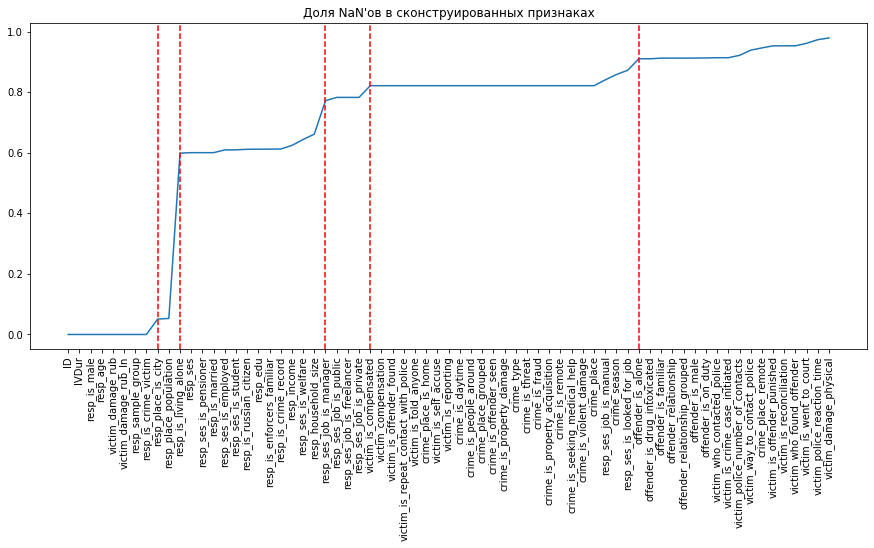

In [0]:
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(range(len(nan_parts)), np.sort(nan_parts))
plt.xticks(range(len(nan_parts)), np.array(made_feats)[np.argsort(nan_parts)], rotation = 90)
plt.axvline(x = nan_dict['resp_place_is_city'], color = 'r', ls = '--')
plt.axvline(x = nan_dict['resp_is_living_alone'], color = 'r', ls = '--')

plt.axvline(x = nan_dict['resp_ses_job_is_manager'], color = 'r', ls = '--')

plt.axvline(x = nan_dict['victim_is_compensated'], color = 'r', ls = '--')

plt.axvline(x = nan_dict['offender_is_alone'], color = 'r', ls = '--')

ax.set_title('Доля NaN\'ов в сконструированных признаках')
plt.show()

In [0]:
main_feats =['IVDur', 'resp_is_male', 'resp_age', 'resp_is_living_alone',
 'resp_is_married', 'resp_household_size', 'resp_income', 'resp_edu', 'resp_is_crime_victim',
 'resp_is_crime_record']

In [0]:
data['IVDur_m'] = data['IVDur'].apply(lambda x: round(x / 60))

In [0]:
data[data.IVDur == 0]

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q5_1T,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,...,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped,IVDur_m
122,13261447,0,1,30,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
223,13263453,0,2,49,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
224,13263455,0,1,45,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
482,13269249,0,1,30,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
835,13274981,0,1,40,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14654,15024304,0,1,37,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
14657,15024762,0,1,24,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
14895,15063683,0,1,58,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
data['ID'][data.IVDur == 0].value_counts()

13317885    1
14289921    1
15024762    1
14140089    1
14156377    1
           ..
15022915    1
13317814    1
14327991    1
13528248    1
13269249    1
Name: ID, Length: 113, dtype: int64

In [0]:
data[data.IVDur == 0].describe()

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,Q20_2,...,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped,IVDur_m
count,1.130000e+02,113.0,113.000000,113.000000,113.000000,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,113.000000,113.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0
mean,1.395784e+07,0.0,1.469027,44.955752,1.991150,1.0,2.0,NaN,2.0,4.0,NaN,1.0,1.0,3.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,NaN,0.0,1.0,1.0,0.0,1.0,NaN,30.973451,0.031363,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
std,5.383460e+05,0.0,0.501263,15.883723,0.094072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.252304,0.333398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,1.326145e+07,0.0,1.000000,19.000000,1.000000,1.0,2.0,NaN,2.0,4.0,NaN,1.0,1.0,3.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,NaN,0.0,1.0,1.0,0.0,1.0,NaN,0.000000,0.000000,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25%,1.348221e+07,0.0,1.000000,30.000000,2.000000,1.0,2.0,NaN,2.0,4.0,NaN,1.0,1.0,3.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,NaN,0.0,1.0,1.0,0.0,1.0,NaN,0.000000,0.000000,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
50%,1.391106e+07,0.0,1.000000,44.000000,2.000000,1.0,2.0,NaN,2.0,4.0,NaN,1.0,1.0,3.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,NaN,0.0,1.0,1.0,0.0,1.0,NaN,0.000000,0.000000,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
75%,1.428962e+07,0.0,2.000000,58.000000,2.000000,1.0,2.0,NaN,2.0,4.0,NaN,1.0,1.0,3.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,NaN,0.0,1.0,1.0,0.0,1.0,NaN,0.000000,0.000000,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
max,1.556076e+07,0.0,2.000000,86.000000,2.000000,1.0,2.0,NaN,2.0,4.0,NaN,1.0,1.0,3.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,NaN,0.0,1.0,1.0,0.0,1.0,NaN,3500.000000,3.544068,NaN,1.0,NaN,NaN,NaN,NaN,0.0,N

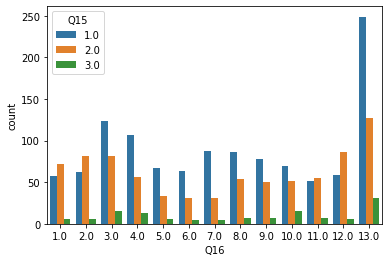

In [0]:
sns.countplot(data = data[data.Q66 > 1], x = 'Q16', hue = 'Q15')
plt.show()

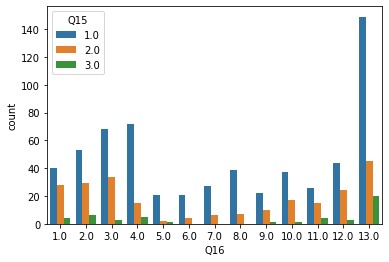

In [0]:
sns.countplot(data = data[data.Q66 == 1], x = 'Q16', hue = 'Q15')
plt.show()

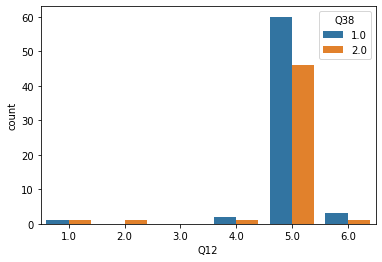

In [0]:
sns.countplot(data = data[data.Q75 == 1], x = 'Q12', hue = 'Q38')
plt.show()

In [0]:
c_vals_of_la = np.sum(data[data.Q78 != 3]['resp_is_living_alone'] == data[data.Q78 != 3]['Q78'].apply(lambda x: x % 3))
c_vals_of_nla = np.sum(data[data.Q78 != 3]['resp_is_living_alone'] != data[data.Q78 != 3]['Q78'].apply(lambda x: x % 3))
print(f'Correct vals of living alone: {c_vals_of_la}')
print(f'Correct vals of not living alone {c_vals_of_nla}')
print(f'Correct vals of all: {c_vals_of_la+c_vals_of_nla}')
print(f'Lenght: {len(data[data.Q78 == 3])}')
#data['Q79'] == data['resp_is_married']

Correct vals of living alone: 1088
Correct vals of not living alone 15659
Correct vals of all: 16747
Lenght: 71


In [0]:
len(data[data.Q78 != 3])

16747

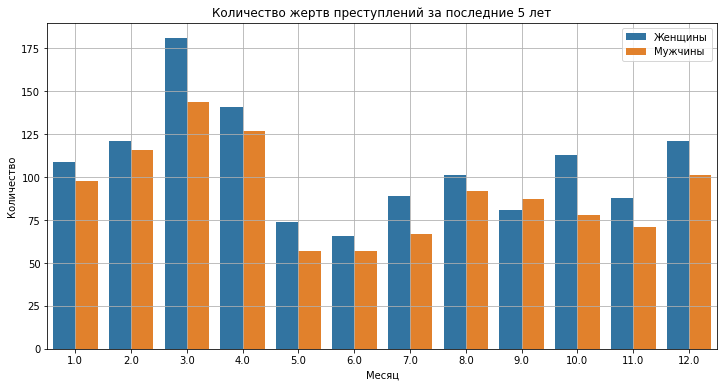

In [156]:
countplot(x = 'Q16', hue = 'Q1', data = data[(data.Q75 == 1) & (data.Q16 != 13)], myTitle = 'Количество жертв преступлений за последние 5 лет',
          myLabels = ['Женщины', 'Мужчины'], xlabel = 'Месяц')

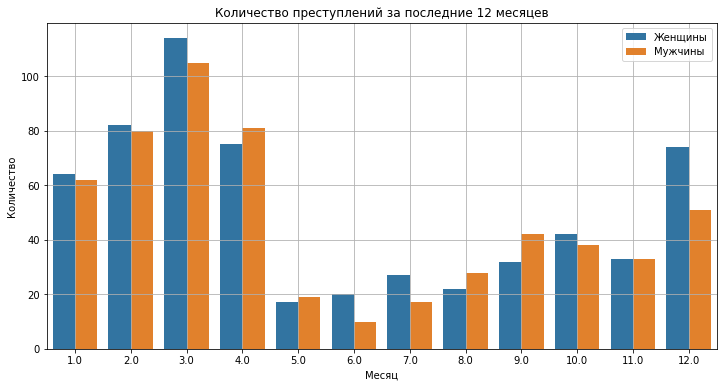

In [157]:
countplot(x = 'Q16', hue = 'Q1', data = data[(data.Q75 == 1) & (data.Q76 == 1) & (data.Q16 != 13)], 
          myTitle = 'Количество преступлений за последние 12 месяцев',
          myLabels = ['Женщины', 'Мужчины'], xlabel = 'Месяц')

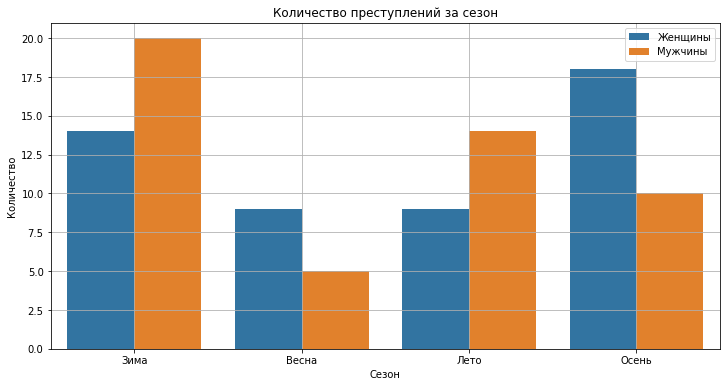

In [158]:
countplot(x = 'Q77', hue = 'Q1', data = data[(data.Q75 == 1) & (data.Q76 == 1) & (data.Q77 != 5)],
          myTitle = 'Количество преступлений за сезон', myLabels = ['Женщины', 'Мужчины'], xlabel = 'Сезон',
          ticks_l = ['Зима', 'Весна', 'Лето', 'Осень'])

In [0]:
def quarter(x):
  if 3 <= x < 6:
    return 2
  elif 6 <= x < 9:
    return 3
  elif 9 <= x < 12:
    return 4
  elif x == 12 or 1 <= x <= 2:
    return 1
  else:
    return 5 

In [0]:
data['crtd_mnth'] = data[(data.Q75 == 1) & (data.Q76 == 1)]['Q16'].apply(quarter)

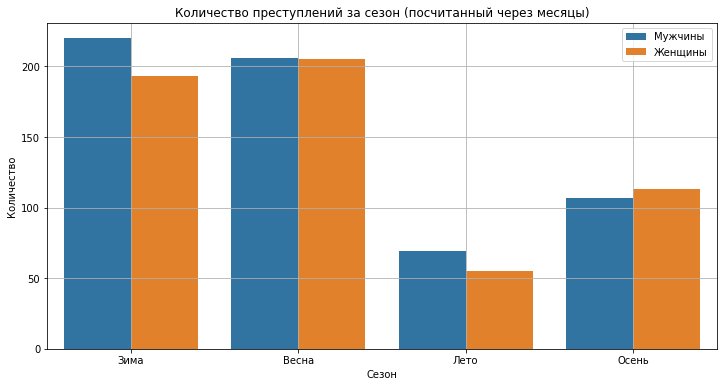

In [0]:
countplot(x = 'crtd_mnth', hue = 'Q1', data = data[(data.Q75 == 1) & (data.Q76 == 1) & (data.Q16 != 13) & (data.Q77 != 5)],
          myTitle = 'Количество преступлений за сезон (посчитанный через месяцы)',
          myLabels = ['Мужчины', 'Женщины'],
          xlabel = 'Сезон', ticks_l = ['Зима', 'Весна', 'Лето', 'Осень'])

No handles with labels found to put in legend.


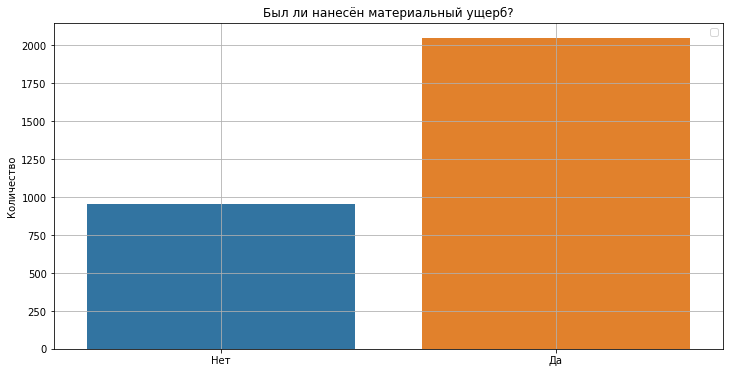

In [161]:
countplot(x = 'crime_is_property_damage', data = data[(data.Q75 == 1)],
          myTitle = 'Был ли нанесён материальный ущерб?', ticks_l = ['Нет', 'Да'])

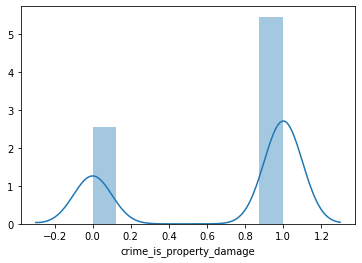

In [0]:
plt.figure(figsize = (12, 6))
sns.distplot(data[(data.Q75 == 1)]['crime_is_property_damage'])
plt.title('Был ли нанесён материальный ущерб?')
x

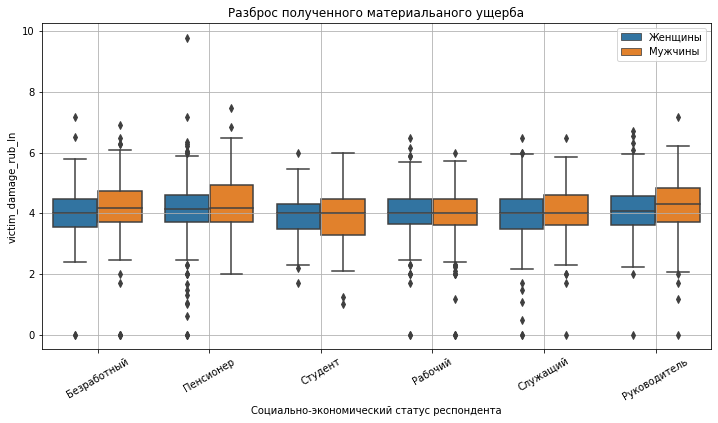

In [162]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'resp_ses', y = 'victim_damage_rub_ln', hue = 'Q1', data = data[(data.Q21 == 2)])
plt.title('Разброс полученного материальаного ущерба')
plt.xlabel('Социально-экономический статус респондента')
ticks = ['Безработный', 'Пенсионер', 'Студент', 'Рабочий','Служащий','Руководитель']
plt.xticks(ticks = np.arange(len(ticks)), labels = ticks, rotation=30)
plt.grid()
for t, l in zip(plt.legend().get_texts(), ['Женщины', 'Мужчины']): t.set_text(l)
plt.show()

In [164]:
data[(data.resp_ses == 2) & (data.Q75 == 1) & (data.victim_damage_rub_ln > 6)].loc[:, ['Q5_1T', 'victim_damage_rub']]

,Q5_1T,victim_damage_rub
2442,мужчина требовал сказать паспортные данные,1.600000e+06
2986,кража снегохода,1.100000e+06
6300,"я вложила деньги в строительство квартиры, ок...",1.170000e+06
7056,угрозы ростехнадзора,3.000000e+07
7874,реэлторы и генеральный директор украл квартиру,2.200000e+06
8311,сняли с выборов депутатов гос. в 2016,7.200000e+06
9249,по телефону была угроза,1.500000e+07
13871,был вкладчиками русь банк признали банкротами...,2.000000e+06
13915,вымогательство денег сотрудниками полиции. за ...,3.000000e+06
14157,мошенничество,6.000000e+09


In [0]:
men = list(data[(data.Q6 == 1) & (data.Q1 == 1)].groupby(['Q10']).count()[['ID']].ID)
women = list(data[(data.Q6 == 1) & (data.Q1 == 2)].groupby(['Q10']).count()[['ID']].ID) + [0]
labels_x = ['Друг', 'Знакомый', 'Затрудняюсь ответить', 'Коллега', 'Незнакомец', 
            'Родственник', 'Сожитель', 'Сосед', 'Супруг(-а)']

In [0]:
def barh(names, values, title=''):
    plt.figure(figsize=(12, 6))
    index = np.argsort(values)
    y_pos = np.arange(len(names))
    plt.barh(y_pos, values[index], tick_label=names[index])
    plt.title(title)
    plt.grid()
    plt.show()

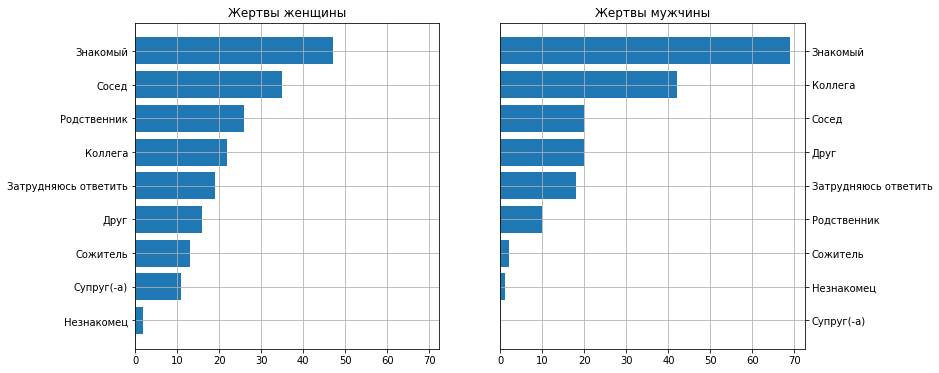

In [168]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

names1 = np.array(labels_x)
values1 = np.array(men)
index1 = np.argsort(values1)
y_pos1 = np.arange(len(names1))
ax[0].barh(y_pos1, values1[index1], tick_label=names1[index1])
ax[0].set_title('Жертвы женщины')
ax[0].grid()

names2 = np.array(labels_x)
values2 = np.array(women)
index2 = np.argsort(values2)
y_pos2 = np.arange(len(names2))
ax[1].barh(y_pos2, values2[index2], tick_label=names2[index2])
ax[1].yaxis.tick_right()
ax[1].grid()
ax[1].set_title('Жертвы мужчины')
plt.show()

In [171]:
data[(data.Q1 == 1) & ((data.Q79 == 1) | (data.Q79 == 2)) & (data.Q75 == 1) & (data.Q10 == 9)]['Q5_1T']

3165                                        избиение 2017 
5181                      ругательство переходило в драку 
5512                                  Издевались, избивал 
9398                  муж по пьяни избил. 23 февраля 2018 
10068                   выламливал дверь.избил беременную 
11180    В  Новый Год. Мы  подрались  с мужем.  Он меня...
15235                        муж кухонный боксёр.минут 15 
Name: Q5_1T, dtype: object

In [0]:
data[data.Q75 == 1]["Q5_1T"]

0                                 полтора года тому назад 
1        открытый грабеж-выхватили сумку с документами ...
2         покупка на авито ,мы отправили деньги ,но нам...
3                                           украли телефон
4        мошенничество,говорят и звонят я твой сын и до...
                               ...                        
16790                               машенники по телефону 
16803    через интернет-магазин приобретал мобильный те...
16807                  пропали в сбербанке 2 вклада в 2015
16814                мошенничество . афера через интернет 
16817          в школе,телефон был в куртке,украли телефон
Name: Q5_1T, Length: 3001, dtype: object

In [0]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
russian_stopwords = stopwords.words("russian")

#Preprocess function
def preprocess_text(text):
    tokens = text.lower().split()
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [0]:
wordcloud = WordCloud().generate(' '.join(data[data.Q75 == 1]["Q5_1T"].apply(preprocess_text)))

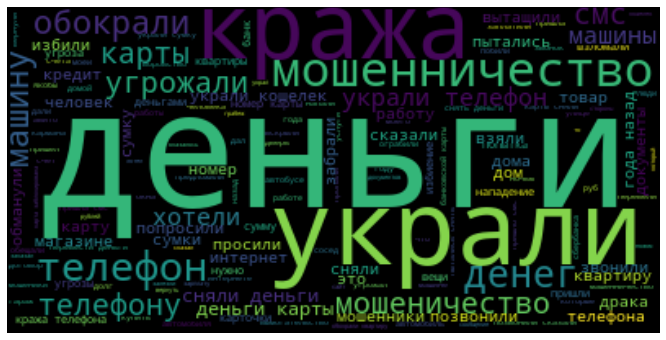

In [0]:
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
freq_dict = dict()

text = ' '.join(data[data.Q75 == 1]["Q5_1T"].apply(preprocess_text))
text = text.split()

for word in text:
  if word in freq_dict.keys():
    freq_dict[word] += 1
  else:
    freq_dict[word] = 0

In [0]:
top_words = sorted(freq_dict.items(), key=lambda kv: kv[1], reverse=True)[:10]
top_words = np.array(top_words)

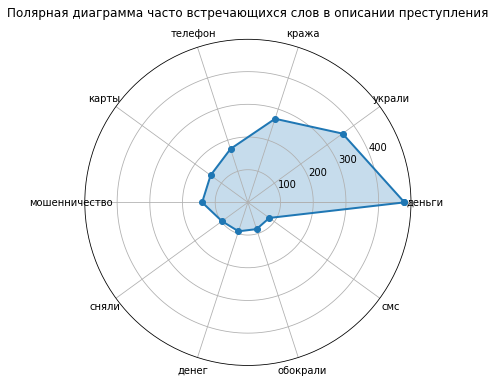

In [0]:
labels = top_words[:, 0]
stats = top_words[:, 1]

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

stats = stats.astype('float')

fig=plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Полярная диаграмма часто встречающихся слов в описании преступления')
ax.grid(True)

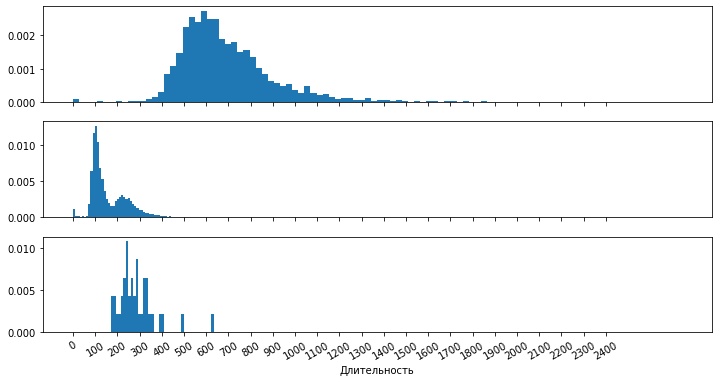

In [0]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize = (12, 6))
ax[0].hist(data[data.Q75 == 1]['IVDur'], 100, density = True)
ax[1].hist(data[data.Q75 == 2]['IVDur'], 100, density = True)
ax[2].hist(data[data.Q75 == 3]['IVDur'], 41, density = True)
plt.xlabel('Длительность')
plt.xticks(np.arange(0, 2500, 100), rotation = 30)
plt.show()

In [0]:
df_wo_crime = data.copy()
cnt_of_nans = data.loc[:, 'Q78':'Q65'].isnull().sum(axis = 1)

In [0]:
social_qs = len(data.loc[:, 'Q78':'Q65'].columns)

In [0]:
data['cnt_of_nans'] = social_qs - cnt_of_nans

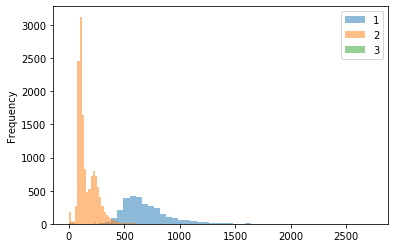

In [0]:
data.groupby('Q75')['IVDur'].plot(kind='hist', bins=50, legend=True, alpha=0.5)

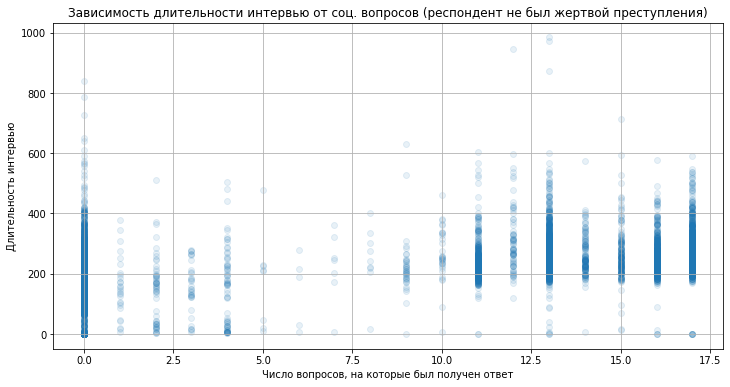

In [0]:
plt.figure(figsize=(12, 6))
plt.scatter(data[data.Q75 == 2]['cnt_of_nans'], data[data.Q75 == 2]['IVDur'],alpha=0.1)
plt.title('Зависимость длительности интервью от соц. вопросов (респондент не был жертвой преступления)')
plt.xlabel('Число вопросов, на которые был получен ответ')
plt.ylabel('Длительность интервью')
plt.grid()
plt.show()

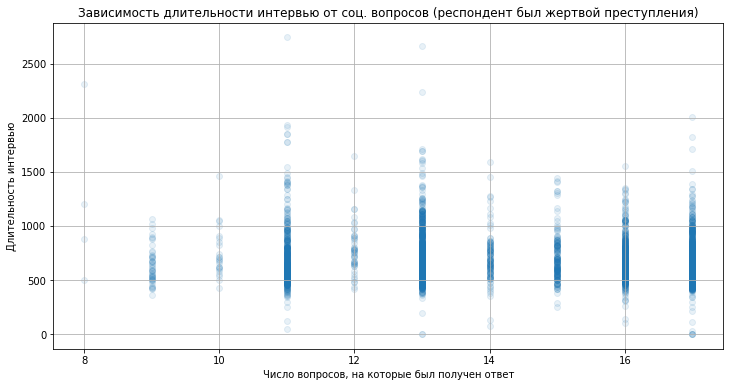

In [0]:
plt.figure(figsize=(12, 6))
plt.scatter(data[data.Q75 == 1]['cnt_of_nans'], data[data.Q75 == 1]['IVDur'],alpha=0.1)
plt.title('Зависимость длительности интервью от соц. вопросов (респондент был жертвой преступления)')
plt.xlabel('Число вопросов, на которые был получен ответ')
plt.ylabel('Длительность интервью')
plt.grid()
plt.show()

Q1
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Q2, dtype: object

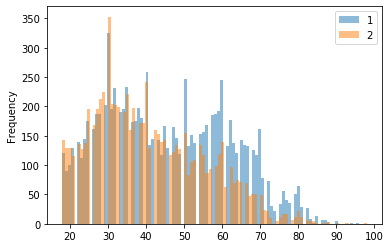

In [0]:
data.groupby(['Q1'])['Q2'].plot(kind='hist', bins=100, legend=True, alpha=0.5)

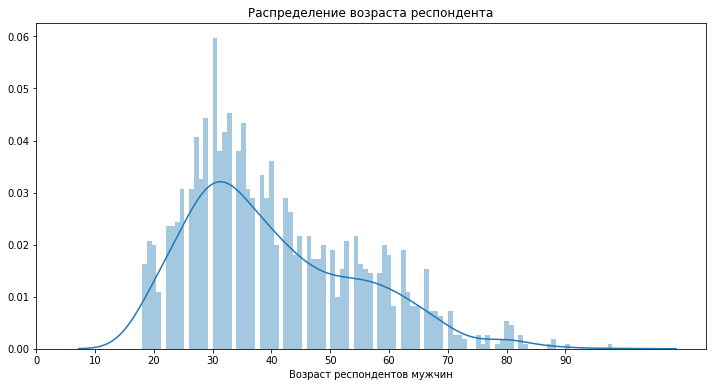

In [169]:
plt.figure(figsize = (12, 6))
sns.distplot(data[(data.Q75 == 1) & (data.Q1 == 2)]['Q2'], bins = 100)
plt.xlabel('Возраст респондентов мужчин')
plt.title('Распределение возраста респондента')
plt.xticks(np.arange(0, 100, 10))
plt.show()

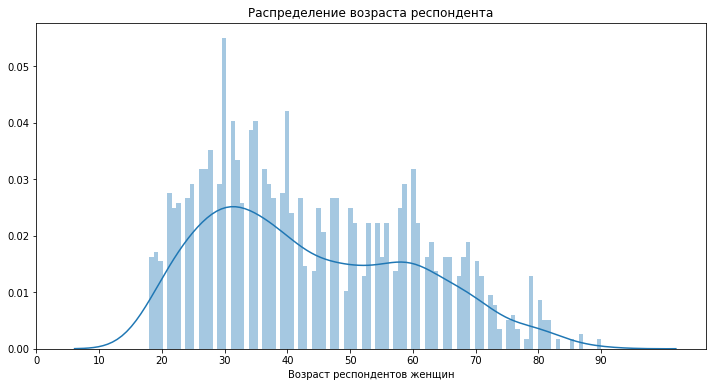

In [170]:
plt.figure(figsize = (12, 6))
sns.distplot(data[(data.Q75 == 1) & (data.Q1 == 1)]['Q2'], bins = 100)
plt.xlabel('Возраст респондентов женщин')
plt.title('Распределение возраста респондента')
plt.xticks(np.arange(0, 100, 10))
plt.show()

In [0]:
feats = ['IVDur', 'cnt_of_nans', 'Q1', 'Q2']

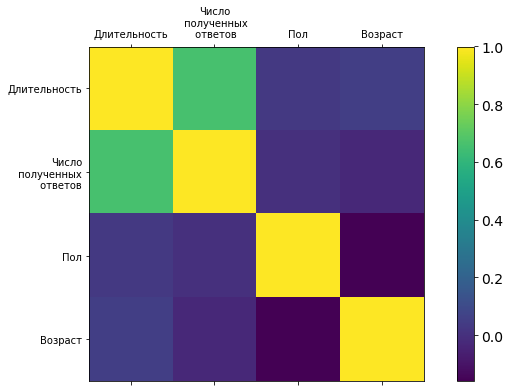

In [0]:
f = plt.figure(figsize=(12, 6))
plt.matshow(data[feats].corr(), fignum=f.number)
plt.xticks(range(data[feats].shape[1]), ['Длительность', 'Число\n полученных\n ответов', 'Пол', 'Возраст'])
plt.yticks(range(data[feats].shape[1]), ['Длительность', 'Число\n полученных\n ответов', 'Пол', 'Возраст'])
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

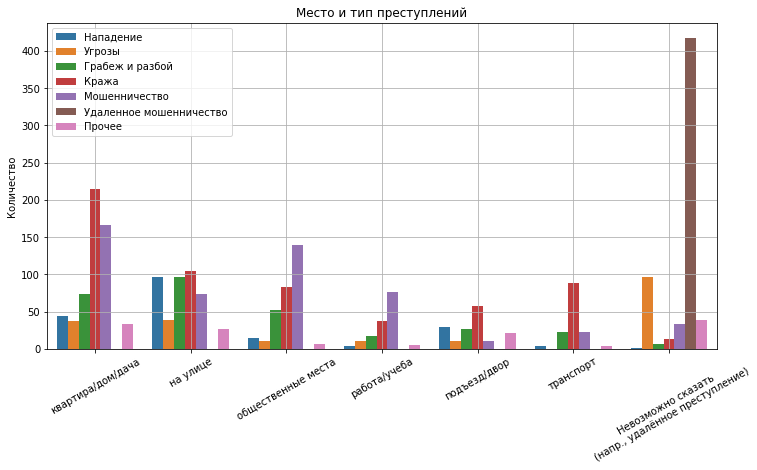

In [0]:
countplot(x = 'crime_place_grouped', data = data[(data.Q75 == 1) & (data.crime_type != 8) & (data.crime_place_grouped != 8)],
          hue = 'crime_type', myTitle = 'Место и тип преступлений', myLabels = ['Нападение', 'Угрозы', 'Грабеж и разбой', 'Кража', 'Мошенничество', 
          'Удаленное мошенничество', 'Прочее'],
          ticks_l = ['квартира/дом/дача', 'на улице','общественные места','работа/учеба', 'подъезд/двор','транспорт',
'Невозможно сказать\n(напр., удалённое преступление)'], rotation = 30)